# Part 2: Feature engineering

Mutual information

A metric to measure the association between feature and target.

It’s like correlation (detect only linear relationship), but it can capture any kind of association. 


In [1]:
# standard
import pandas as pd

# data set path
data_path = "C:/Users/Sadek/Documents/GitHub/Project/telecom-customer-churn/data/"

In [18]:
# import telecom data set into a pandas data frame
df_telecom = pd.read_csv(data_path+"WA_Fn-UseC_-Telco-Customer-Churn.csv")

# convert TotalCharges from object to numeric
df_telecom["TotalCharges"] = pd.to_numeric(df_telecom["TotalCharges"], errors="coerce")

# drop observation with null values
df_telecom.dropna(inplace=True)

# drop customerID from the data set
df_telecom.drop(columns="customerID", inplace=True)

# df_telecom['Churn']=df_telecom['Churn'].map({'No':0,'Yes':1})

In [19]:
X = df_telecom.copy()
y = X.pop("Churn")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize() # Just affect the desired info (array - Index)

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes != (float or int)

discrete_features

gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [20]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Contract            0.098182
TechSupport         0.062873
PaymentMethod       0.044423
DeviceProtection    0.043784
PaperlessBilling    0.019119
SeniorCitizen       0.010533
gender              0.000037
Name: MI Scores, dtype: float64

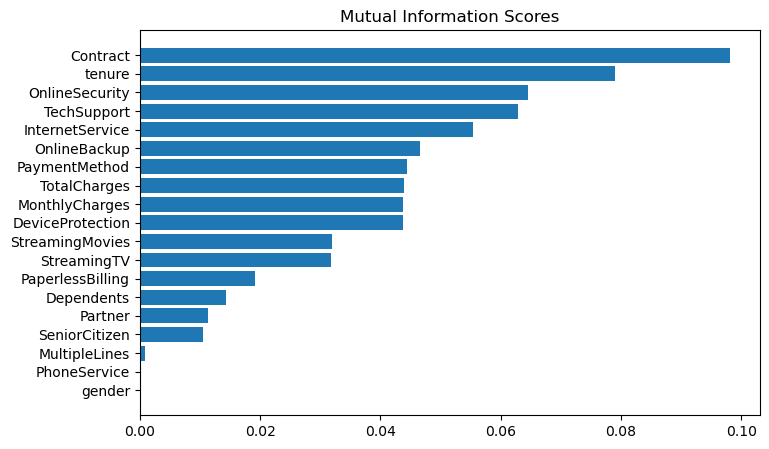

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [6]:
 df_telecom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
from sklearn.metrics import mutual_info_score

# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_telecom["Churn"])


# select categorial variables excluding the response variable 
categorical_variables = df_telecom.select_dtypes(include=object).drop("Churn", axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


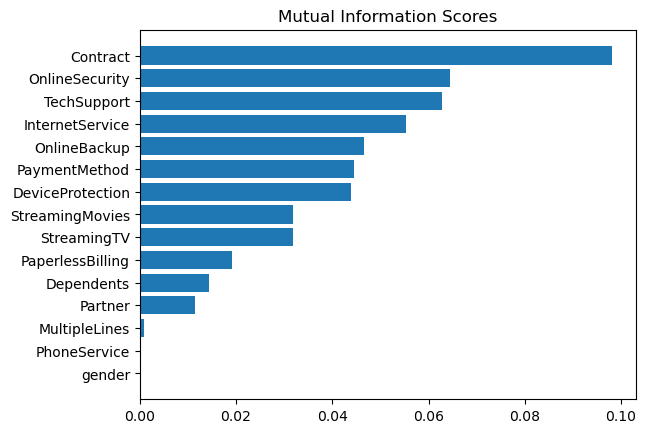

In [30]:
plot_mi_scores(feature_importance)